<a href="https://colab.research.google.com/github/Kremmydasalexandros/datastories_for_emme/blob/main/%CE%93%CE%A5%CE%9D%CE%91%CE%99%CE%9A%CE%9F%CE%9A%CE%A4%CE%9F%CE%9D%CE%99%CE%91_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 26.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime


In [13]:
emolex_df = pd.read_csv("https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv")
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:

emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [7]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
import spacy

In [18]:
nlp = spacy.load('el_core_news_sm')

In [19]:
df = pd.read_csv("/content/gdrive/MyDrive/gunaikoktonia1.csv")
df

,title,text
0,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ..."
1,Τα διδάγματα και η προτροπή μου,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...
2,Ποινή φυλάκισης 12 μηνών αλλά εξαγοράσιμη στον...,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...
3,Το Προξενιό της Ιουλίας: Ο Προβιός στο χώμα κα...,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...
4,Εκλογές στο Ιράν: Θα αλλάξουν οι σχέσεις με τι...,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...
...,...,...
1431,Τροιζήνα: Παιδί σκοτώθηκε στο φαράγγι Διαβολογ...,Το άτυχο\nαγόρι\nείχε πάει με γκρουπ τουριστών...
1432,Το Σάββατο 29 Ιουνίου το 40ήμερο μνημόσυνο της...,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...
1433,"Φωτεινή Ντεμίρη: «Είμαι κατά του γάμου, αν ήτα...",«Είμαι σε μία μεταβατική κατάσταση και θέλω να...
1434,Φυλακές Κορυδαλλού: Η ανακοίνωση του υπουργείο...,"Ανακοίνωση για την φονική συμπλοκή, με έναν νε..."


In [20]:
len(df)

1436

In [21]:

df.head(1)

,title,text
0,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ..."


In [22]:
df = df[[  'text' ]]
df = df.rename(columns={'title': 'text'} )

In [23]:
df

,text
0,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ..."
1,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...
2,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...
3,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...
4,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...
...,...
1431,Το άτυχο\nαγόρι\nείχε πάει με γκρουπ τουριστών...
1432,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...
1433,«Είμαι σε μία μεταβατική κατάσταση και θέλω να...
1434,"Ανακοίνωση για την φονική συμπλοκή, με έναν νε..."


In [24]:
df.tail()

,text
1431,Το άτυχο\nαγόρι\nείχε πάει με γκρουπ τουριστών...
1432,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...
1433,«Είμαι σε μία μεταβατική κατάσταση και θέλω να...
1434,"Ανακοίνωση για την φονική συμπλοκή, με έναν νε..."
1435,Οι Αρχές της Ιταλίας ερευνούν την άγρια δολοφο...


In [25]:
df.dtypes

text    object
dtype: object

In [26]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [27]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [28]:
matrix = vec.fit_transform(df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
wordcount_df.shape

(1436, 13161)

In [30]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [32]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']


angry_words = emolex_df[emolex_df.Anger == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


fear_words = emolex_df[emolex_df.Fear == 1]['word']


joy_words = emolex_df[emolex_df.Joy == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [33]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']
positive_words

0                       αφεση
8                        αμην
11                  αυγουστος
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
                 ...         
13109        ζωτικης σημασιας
13132              αδιαβροχος
13137            καλωσορισατε
13145      απροσδοκητα ευρημα
13158                νεοτερος
Name: word, Length: 2352, dtype: object

In [34]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
wordcount_df[positive_words].tail(1)

,αφεση,αμην,αυγουστος,γαμηλιο ταξιδι,διευθυντρια σχολειου,δημοκρατια,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,...,αναμφιβολως,ανυπερβατος,ανηφορικος δρομος,βελουδενιος,δικαιωσε,ζωτικης σημασιας,αδιαβροχος,καλωσορισατε,απροσδοκητα ευρημα,νεοτερος
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
wordcount_df[trust_words].sum(axis=1)

0       67
1        9
2       20
3        1
4       34
        ..
1431     3
1432     4
1433     9
1434     7
1435     8
Length: 1436, dtype: int64

In [37]:
df.head(3)

,text
0,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ..."
1,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...
2,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...


In [38]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positive'] = wordcount_df[positive_words].sum(axis=1)

df['joy'] = wordcount_df[joy_words].sum(axis=1)

df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)

df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [39]:
df

,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",82,106,39,45,28,67,49,45,100,62
1,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...,0,17,6,0,3,9,5,0,7,2
2,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...,28,23,2,15,5,20,10,15,35,33
3,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...,4,5,1,3,5,1,3,5,5,5
4,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...,14,49,7,8,8,34,16,9,27,17
...,...,...,...,...,...,...,...,...,...,...,...
1431,Το άτυχο\nαγόρι\nείχε πάει με γκρουπ τουριστών...,1,5,4,3,0,3,4,2,5,5
1432,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...,0,5,3,0,0,4,2,1,0,0
1433,«Είμαι σε μία μεταβατική κατάσταση και θέλω να...,5,19,7,3,1,9,5,5,14,4
1434,"Ανακοίνωση για την φονική συμπλοκή, με έναν νε...",11,10,4,3,7,7,14,15,20,17


In [240]:
df['fear' ].max()

86

In [126]:
df['disgust' ].max()

63

In [127]:
disgust_text =  df.iloc[62]['text']
print(disgust_text)

Πλέον, είναι στην κρίση του Συμβουλίου Πλημμελειοδικών το αν θα παραμείνει προφυλακισμένος ή θα επιστρέψει στο σπίτι του στο Χαλάνδρι υπό όρους, ίσως με «βραχιολάκι».
Η σύζυγός του, από την άλλη, δεν κάνει βήμα πίσω. Η δικηγόρος με υπόμνημά που κατέθεσε μέσω του δικηγόρου της, ζητάει την άρση του τηλεφωνικού απορρήτου του Απόστολου Λύτρα από τις 16 μέχρι τις 19 Ιουνίου. Από τη νύχτα του άγριου ξυλοδαρμού, δηλαδή μέχρι τη σύλληψη του ποινικολόγου.
Η 37χρονη επιδιώκει να αποδείξει ότι ο Απόστολος Λύτρας παραβίασε τους περιοριστικούς όρους και να εκμηδενίσει τις ελπίδες του να αποφυλακιστεί.
Στο υπόμνημά της αναφέρεται στη νύχτα του ξυλοδαρμού. Όπως λέει, ο σύζυγός της δέχθηκε να την μεταφέρει στο νοσοκομείο μόνο όταν τον διαβεβαίωσε ότι θα πει πως έπεσε μόνης της, αφήνοντάς τον εκτός κάδρου. Ο ποινικολόγος απαίτησε από εκείνη να καθαρίσει τα αίματα και να αλλάξει ρούχα. Την έπλυνε μάλιστα, ο ίδιος για να είναι βέβαιος.
«Πήρε το τηλέφωνο του μπάνιου και μου έριχνε νερό στο πρόσωπο προκειμ

In [201]:
df.head(64)

,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",82,106,39,45,28,67,49,45,100,62
1,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...,0,17,6,0,3,9,5,0,7,2
2,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...,28,23,2,15,5,20,10,15,35,33
3,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...,4,5,1,3,5,1,3,5,5,5
4,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...,14,49,7,8,8,34,16,9,27,17
...,...,...,...,...,...,...,...,...,...,...,...
59,“Ήταν δίπλα μου όταν είχα δυσκολίες στο να μεί...,2,8,5,1,5,7,3,5,8,5
60,Τις εφιαλτικές στιγμές που έζησε μετά τον άγρι...,21,52,18,13,10,39,26,17,36,35
61,«Θα παίξουμε μαζί στις 16 Ιουλίου με τον τενόρ...,3,9,4,1,4,9,2,6,8,5
62,"Πλέον, είναι στην κρίση του Συμβουλίου Πλημμελ...",5,13,6,5,4,13,5,4,10,8


<Axes: xlabel='fear'>

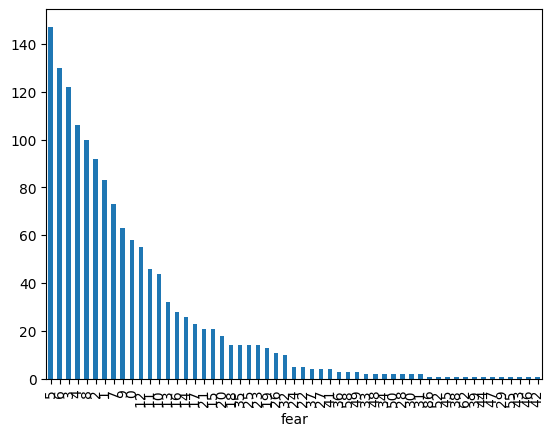

In [41]:
df['fear'].value_counts().plot(kind='bar')

In [42]:
df.columns

Index(['text', 'anger', 'positive', 'joy', 'disgust', 'surprise', 'trust',
       'anticipation', 'sadness', 'negative', 'fear'],
      dtype='object')

In [43]:
df["text"]

0       Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...
1       Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...
2       Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...
3       Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...
4       Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...
                              ...                        
1431    Το άτυχο\nαγόρι\nείχε πάει με γκρουπ τουριστών...
1432    Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...
1433    «Είμαι σε μία μεταβατική κατάσταση και θέλω να...
1434    Ανακοίνωση για την φονική συμπλοκή, με έναν νε...
1435    Οι Αρχές της Ιταλίας ερευνούν την άγρια δολοφο...
Name: text, Length: 1436, dtype: object

In [277]:
fear_text =  df.iloc[86]['text']
print(fear_text)

Ξυλοκοπήθηκε και βιάστηκε αλλεπάλληλες φορές μέχρι που στις 24 Φεβρουαρίου του 1996 βρέθηκε από τους φύλακες κρεμασμένος με καλώδιο τηλεόρασης μέσα στο κελί του
Ήταν παραμονή πρωτοχρονιάς του 1993 όταν η κοινή γνώμη συγκλονιζόταν από ένα αδιανόητο για τότε έγκλημα. Ο Μανώλης Δουρής συνελήφθη για τον
βιασμό και τη δολοφονία του 6χρονου γιου του Νίκου.
Η Ελλάδα παγώνει και παράλληλα οργίζεται. Ο Δουρής οδηγείται στις φυλακές. Στις 24 Φεβρουαρίου του 1996, σχεδόν δυο χρόνια μετά τη δολοφονία του γιου του, ο Μανώλης Δουρής έδωσε τέλος στη ζωή του μέσα στο κελί, στις φυλακές της Τρίπολης
.
Η σοκαρισμένη ελληνική κοινωνία θεώρησε πως μια αστυνομική υπόθεση που έριξε βαριά τη σκιά της, θα έκλεινε με την καταδίκη του πρωταγωνιστή της. Η υπόθεση αυτή ήταν του Μανώλη Δουρή. Η καταδίκη, από το κακουργιοδικείο Κορίνθου, σε ισόβια του πατέρα που κατηγορήθηκε για τον βιασμό και τη
δολοφονία
του παιδιού του, ήταν αυτό που όλοι ζητούσαν.
Λίγο καιρό αργότερα, ωστόσο, στις 24 Φεβρουαρίου 1996 ο Δουρής β

In [278]:
doc = nlp(df['text'][86])

In [279]:
fear_text

'Ξυλοκοπήθηκε και βιάστηκε αλλεπάλληλες φορές μέχρι που στις 24 Φεβρουαρίου του 1996 βρέθηκε από τους φύλακες κρεμασμένος με καλώδιο τηλεόρασης μέσα στο κελί του\nΉταν παραμονή πρωτοχρονιάς του 1993 όταν η κοινή γνώμη συγκλονιζόταν από ένα αδιανόητο για τότε έγκλημα. Ο\xa0Μανώλης Δουρής\xa0συνελήφθη για τον\nβιασμό και τη δολοφονία του 6χρονου γιου του Νίκου.\nΗ Ελλάδα παγώνει και παράλληλα οργίζεται. Ο Δουρής οδηγείται στις φυλακές. Στις 24 Φεβρουαρίου του 1996, σχεδόν δυο χρόνια μετά τη δολοφονία του γιου του,\xa0ο Μανώλης Δουρής έδωσε τέλος στη ζωή του μέσα στο κελί, στις φυλακές της Τρίπολης\n.\nΗ σοκαρισμένη ελληνική κοινωνία θεώρησε πως μια αστυνομική υπόθεση που έριξε βαριά τη σκιά της, θα έκλεινε με την καταδίκη του πρωταγωνιστή της. Η υπόθεση αυτή ήταν του Μανώλη Δουρή. Η καταδίκη, από το κακουργιοδικείο Κορίνθου, σε ισόβια του πατέρα που κατηγορήθηκε για τον βιασμό και τη\nδολοφονία\nτου παιδιού του, ήταν αυτό που όλοι ζητούσαν.\nΛίγο καιρό αργότερα, ωστόσο, στις 24 Φεβρουαρί

In [280]:
doc = nlp(df['text'][86])

In [281]:
for token in doc:
    print(token, token.lemma_)

Ξυλοκοπήθηκε Ξυλοκοπήθηκε
και και
βιάστηκε βιάστηκε
αλλεπάλληλες αλλεπάλληλος
φορές φορά
μέχρι μέχρι
που που
στις σε ο
24 24
Φεβρουαρίου Φεβρουαρίου
του ο
1996 1996
βρέθηκε βρέθηκε
από από
τους ο
φύλακες φύλακη
κρεμασμένος κρεμασμένος
με με
καλώδιο καλώδιο
τηλεόρασης τηλεόραση
μέσα μέσα
στο σε ο
κελί κελίς
του ο

 

Ήταν Ήταν
παραμονή παραμονή
πρωτοχρονιάς πρωτοχρονιάς
του ο
1993 1993
όταν όταν
η ο
κοινή κοινός
γνώμη γνώμη
συγκλονιζόταν συγκλονιζόταν
από από
ένα ένας
αδιανόητο αδιανόητο
για για
τότε τότε
έγκλημα έγκλημα
. .
Ο ο
   
Μανώλης Μανώλης
Δουρής δουρής
   
συνελήφθη συνελήφθη
για για
τον ο

 

βιασμό βιασμός
και και
τη ο
δολοφονία δολοφονία
του ο
6χρονου 6χρονου
γιου γιος
του ο
Νίκου Νίκος
. .

 

Η ο
Ελλάδα Ελλάδα
παγώνει παγώνω
και και
παράλληλα παράλληλα
οργίζεται οργίζεται
. .
Ο ο
Δουρής δουρής
οδηγείται οδηγείται
στις σε ο
φυλακές φυλακός
. .
Στις σε ο
24 24
Φεβρουαρίου Φεβρουάριος
του ο
1996 1996
, ,
σχεδόν σχεδόν
δυο δυο
χρόνια χρόνος
μετά μετά
τη ο
δολοφονία δολοφονία


In [282]:
df['text'][86]

'Ξυλοκοπήθηκε και βιάστηκε αλλεπάλληλες φορές μέχρι που στις 24 Φεβρουαρίου του 1996 βρέθηκε από τους φύλακες κρεμασμένος με καλώδιο τηλεόρασης μέσα στο κελί του\nΉταν παραμονή πρωτοχρονιάς του 1993 όταν η κοινή γνώμη συγκλονιζόταν από ένα αδιανόητο για τότε έγκλημα. Ο\xa0Μανώλης Δουρής\xa0συνελήφθη για τον\nβιασμό και τη δολοφονία του 6χρονου γιου του Νίκου.\nΗ Ελλάδα παγώνει και παράλληλα οργίζεται. Ο Δουρής οδηγείται στις φυλακές. Στις 24 Φεβρουαρίου του 1996, σχεδόν δυο χρόνια μετά τη δολοφονία του γιου του,\xa0ο Μανώλης Δουρής έδωσε τέλος στη ζωή του μέσα στο κελί, στις φυλακές της Τρίπολης\n.\nΗ σοκαρισμένη ελληνική κοινωνία θεώρησε πως μια αστυνομική υπόθεση που έριξε βαριά τη σκιά της, θα έκλεινε με την καταδίκη του πρωταγωνιστή της. Η υπόθεση αυτή ήταν του Μανώλη Δουρή. Η καταδίκη, από το κακουργιοδικείο Κορίνθου, σε ισόβια του πατέρα που κατηγορήθηκε για τον βιασμό και τη\nδολοφονία\nτου παιδιού του, ήταν αυτό που όλοι ζητούσαν.\nΛίγο καιρό αργότερα, ωστόσο, στις 24 Φεβρουαρί

In [283]:
' '.join(token.lemma_ for token in doc)

'Ξυλοκοπήθηκε και βιάστηκε αλλεπάλληλος φορά μέχρι που σε ο 24 Φεβρουαρίου ο 1996 βρέθηκε από ο φύλακη κρεμασμένος με καλώδιο τηλεόραση μέσα σε ο κελίς ο \n Ήταν παραμονή πρωτοχρονιάς ο 1993 όταν ο κοινός γνώμη συγκλονιζόταν από ένας αδιανόητο για τότε έγκλημα . ο \xa0 Μανώλης δουρής \xa0 συνελήφθη για ο \n βιασμός και ο δολοφονία ο 6χρονου γιος ο Νίκος . \n ο Ελλάδα παγώνω και παράλληλα οργίζεται . ο δουρής οδηγείται σε ο φυλακός . σε ο 24 Φεβρουάριος ο 1996 , σχεδόν δυο χρόνος μετά ο δολοφονία ο γιος μου , \xa0 ο Μανώλης δουρής δίνω τέλος σε ο ζωή μου μέσα σε ο κελίς , σε ο φυλακός ο Τρίπολη \n . \n ο σοκαρισμένη ελληνικός κοινωνία θεωρώ πως ένας αστυνομικός υπόθεση που έριξε βαριά ο σκιά μου , θα έκλεινε με ο καταδίκη ο πρωταγωνιστή μου . ο υπόθεση αυτός είμαι ο Μανώλη δουρή . ο καταδίκη , από ο κακουργιοδικείο Κορίνθου , σε ισόβια μου πατέρα που κατηγορώ για ο βιασμός και ο \n δολοφονία \n ο παιδιού μου , είμαι αυτός που όλος ζητούσαν . \n Λίγο καιρός αργά , ωστόσο , σε ο 24 Φεβρου

In [286]:
full_doc = nlp(fear_text)

In [287]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [288]:

clear_text = ' '.join(token.lemma_ for token in full_doc)

In [306]:
clear_text[200:400]

'ός γνώμη συγκλονιζόταν από ένας αδιανόητο για τότε έγκλημα . ο \xa0 Μανώλης δουρής \xa0 συνελήφθη για ο \n βιασμός και ο δολοφονία ο 6χρονου γιος ο Νίκος . \n ο Ελλάδα παγώνω και παράλληλα οργίζεται . ο δουρή'

In [307]:
custom_stopwords = ['ακομα','ακομη','αλλα','αλλες','αλλη','αλλης','αλλων','αν','ανα','αναμεσα','απ','απο','αρα','αραγε','αργα','αρκετα','ας','αυριο','αυτα','αυτες','αυτη','αυτην','αυτης','αυτο','αυτοι','αυτον','αυτος','αυτου','αυτους','αυτων','αφου','γι','για','γιατι','δα','δε','δει','δεινα','δεν','δηλαδη','δι','δια','διοτι','δις','διχως','εαν','ειδεμη','ειθε','ειπαν','ειπε','εις','ειτε','εκαστα','εκαστες','εκαστη','εκαστην','εκαστης','εκαστο','εκαστοι','εκαστον','εκαστος','εκαστου','εκαστους','εκαστων','εκει','εκεινα','εκεινες','εκεινη','εκεινην','εκεινης','εκεινο','εκεινοι','εκεινον','εκεινος','εκεινου','εκεινους','εκεινων','εκτος','εμας','εμεις','εμενα','εμπρος','εν','ενα','εναν','ενας','ενος','εντελως','εντος','εντωμεταξυ','ενω','ενωπιον','εξ','εξαφνα','εξης','εξισου','εξω','επανω','επειδη','επειτα','επι','επιπλεον','επισης','επομενως','εσας','εσεις','εσενα','εστω','εσυ','ετερα','ετεραι','ετερας','ετερες','ετερη','ετερης','ετερο','ετεροι','ετερον','ετερος','ετερου','ετερους','ετερων','ετουτα','ετουτες','ετουτη','ετουτην','ετουτης','ετουτο','ετουτοι','ετουτον','ετουτος','ετουτου','ετουτους','ετουτων','ετσι','ευθυς','εφεξης','εχθες','εχτες','εχω','εως','η','ηδη','ητοι','ηττον','θα','ιδια','ιδιαν','ιδιας','ιδιες','ιδιο','ιδιοι','ιδιον','ιδιος','ιδιου','ιδιους','ιδιων','ιδιως','ισαμε','ισια','ισως','καθε','καθεμια','καθεμιας','καθενα','καθενας','καθενος','καθετι','καθολου','καθως','και','καμια','καμιαν','καμιας','καν','κανεν','κανενα','κανεναν','κανενας','κανενος','κανετε','κανουμε','κανουν','καποια','καποιαν','καποιας','καποιες','καποιο','καποιοι','καποιον','καποιος','καποιου','καποιους','καποιων','καποτε','καπου','καπως','κατ','κατι','κατιτι','κατοπιν','κατω','κι','κιολας','κλπ','κοντα','κτλ','κυριως','λογω','λοιπα','λοιπον','μα','μας','μαζι','μακαρι','μαλιστα','μαλλον','μας','με','μεθαυριο','μεμιας','μεν','μερικα','μερικες','μερικοι','μερικους','μερικων','μεσα','μεσω','μετ','μετα','μεταξυ','μεχρι','μη','μηδε','μην','μηπως','μητε','μια','μιαν','μιας','μολις','μολονοτι','μονομιας','μου','να','ναι','ο','οι','ολα','ολες','ολη','ολην','ολης','ολο','ολοι','ολον','ολονεν','ολος','ολου','ολους','ολων','ολως','ολωσδιολου','ομως','οποια','οποιαδηποτε','οποιαν','οποιανδηποτε','οποιας','οποιασδηποτε','οποιδηποτε','οποιες','οποιεσδηποτε','οποιο','οποιοδηποτε','οποιοι','οποιον','οποιονδηποτε','οποιος','οποιοσδηποτε','οποιου','οποιουδηποτε','οποιους','οποιουσδηποτε','οποιων','οποιωνδηποτε','οποτε','οποτεδηποτε','οπου','οπουδηποτε','οπως','ορισμενα','ορισμενες','ορισμενων','ορισμενως','οσα','οσαδηποτε','οσες','οσεσδηποτε','οση','οσηδηποτε','οσην','οσηνδηποτε','οσης','οσησδηποτε','οσο','οσοδηποτε','οσοι','οσοιδηποτε','οσον','οσονδηποτε','οσος','οσοσδηποτε','οσου','οσουδηποτε','οσους','οσουσδηποτε','οσων','οσωνδηποτε','οταν','οτι','οτιδηποτε','οτου','ου','ουδε','ουτε','παντα','παντοτε','παντου','παντως','παρ','παρα','πει','περα','περι','περιπου','περσι','περυσι','πια','πιθανον','πιο','πισω','πλαι','πλεον','πλην','ποια','ποιαν','ποιας','ποιες','ποιο','ποιοι','ποιον','ποιος','ποιου','ποιους','ποιων','πολλα','πολυ','ποσες','ποση','ποσην','ποσης','ποσο','ποσοι','ποσος','ποσους','ποτε','που','πουθε','πουθενα','πρεπει','πριν','προ','προκειται','προς','προτου','προχθες','προχτες','πρωτα','πρωτη','πρωτης','πρωτυτερα','πως','σαν','σας','σε','σεις','σημερα','σιγα','σου','στα','στη','στην','στης','στις','στο','στον','στου','στους','στων','συν','συχνα','συχνας','συχνες','συχνη','συχνην','συχνης','συχνο','συχνοι','συχνον','συχνος','συχνου','συχνου','συχνους','συχνων','συχνως','σχεδον','σωστα','τα','ταδε','ταυτα','ταυτες','ταυτη','ταυτην','ταυτης','ταυτο','ταυτον','ταυτος','ταυτου','ταυτοχρονα','ταυτων','τελικα','τελικως','τες','τετοια','τετοιαν','τετοιας','τετοιες','τετοιο','τετοιοι','τετοιον','τετοιος','τετοιου','τετοιους','τετοιων','τη','την','της','τι','τιποτα','τιποτε','τις','το','τοι','τον','τος','τοσα','τοσες','τοση','τοσην','τοσης','τοσο','τοσοι','τοσον','τοσος','τοσου','τοσους','τοσων','τοτε','του','τουλαχιστο','τουλαχιστον','τους','τουτα','τουτες','τουτη','τουτην','τουτης','τουτο','τουτοι','τουτοις','τουτον','τουτος','τουτου','τουτους','τουτων','τυχον','των','τωρα','υπ','υπερ','υπο','υποψη','υποψιν','υστερα','χθες','χτες','χωρις','ψηλα','ω','ως','ωσαν','ωσοτου','ωσπου','ωστε','ωστοσο','ωχ']


In [310]:
nlp.Defaults.stop_words |= {"και","σε", "για","ο","να","μου"}

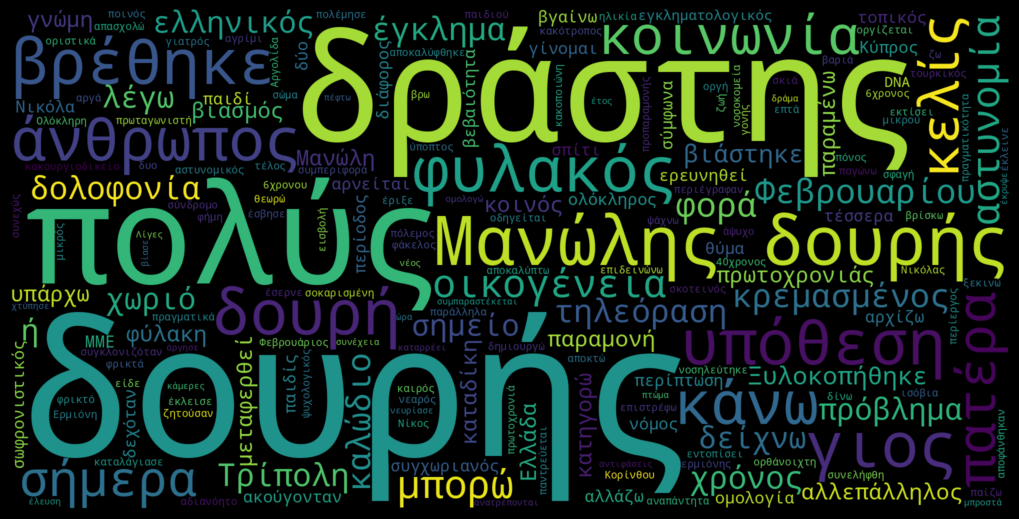

In [311]:

wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [43]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import spacy

In [44]:
df2 = pd.read_csv("/content/gdrive/MyDrive/GYNAIKOKTONIA.csv")

In [45]:
df2

,type,source,title,text,categories,sentiment,impact,date,time,link
0,web,athina984.gr,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Positive,76.8340,2024-06-28,22:38:01,https://athina984.gr/2024/06/28/omilia-koytsoy...
1,web,kathimerini.gr,Τα διδάγματα και η προτροπή μου,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Positive,99.5491,2024-06-28,22:37:53,https://www.kathimerini.gr/opinion/readers/563...
2,web,athlosnews.gr,Ποινή φυλάκισης 12 μηνών αλλά εξαγοράσιμη στον...,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Neutral,84.6200,2024-06-28,22:33:37,https://athlosnews.gr/835282/poini-fylakisis-1...
3,web,youfly.com,Το Προξενιό της Ιουλίας: Ο Προβιός στο χώμα κα...,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Neutral,96.5030,2024-06-28,22:32:29,https://youfly.com/tileorasi/to-proxenio-tis-i...
4,web,in.gr,Εκλογές στο Ιράν: Θα αλλάξουν οι σχέσεις με τι...,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Neutral,99.8697,2024-06-28,22:32:09,https://www.in.gr/2024/06/28/world/ekloges-sto...
...,...,...,...,...,...,...,...,...,...,...
1448,web,coollife.gr,Σοφία Πολυζωγοπούλου – Η σύζυγος του Απόστολου...,NaN,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Negative,40.0000,2024-06-27,22:01:44,https://coollife.gr/2024/06/27/%cf%83%ce%bf%cf...
1449,web,karditsalive.net,Το Σάββατο 29 Ιουνίου το 40ήμερο μνημόσυνο της...,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Positive,95.9018,2024-06-27,22:01:39,https://www.karditsalive.net/karditsa/%CF%84%C...
1450,web,znews.gr,"Φωτεινή Ντεμίρη: «Είμαι κατά του γάμου, αν ήτα...",«Είμαι σε μία μεταβατική κατάσταση και θέλω να...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Positive,96.0721,2024-06-27,22:01:00,https://znews.gr/media/late-night-shows/fotein...
1451,web,enikos.gr,Φυλακές Κορυδαλλού: Η ανακοίνωση του υπουργείο...,"Ανακοίνωση για την φονική συμπλοκή, με έναν νε...",ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Neutral,99.7695,2024-06-27,22:00:58,https://www.enikos.gr/society/fylakes-korydall...


In [46]:
df2.drop_duplicates(inplace=True)
df2.dropna(inplace=True)
df2 = df2.reset_index(drop=True)

In [47]:
df2

,type,source,title,text,categories,sentiment,impact,date,time,link
0,web,athina984.gr,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Positive,76.8340,2024-06-28,22:38:01,https://athina984.gr/2024/06/28/omilia-koytsoy...
1,web,kathimerini.gr,Τα διδάγματα και η προτροπή μου,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Positive,99.5491,2024-06-28,22:37:53,https://www.kathimerini.gr/opinion/readers/563...
2,web,athlosnews.gr,Ποινή φυλάκισης 12 μηνών αλλά εξαγοράσιμη στον...,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Neutral,84.6200,2024-06-28,22:33:37,https://athlosnews.gr/835282/poini-fylakisis-1...
3,web,youfly.com,Το Προξενιό της Ιουλίας: Ο Προβιός στο χώμα κα...,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Neutral,96.5030,2024-06-28,22:32:29,https://youfly.com/tileorasi/to-proxenio-tis-i...
4,web,in.gr,Εκλογές στο Ιράν: Θα αλλάξουν οι σχέσεις με τι...,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Neutral,99.8697,2024-06-28,22:32:09,https://www.in.gr/2024/06/28/world/ekloges-sto...
...,...,...,...,...,...,...,...,...,...,...
1431,web,ieidiseis.gr,Τροιζήνα: Παιδί σκοτώθηκε στο φαράγγι Διαβολογ...,Το άτυχο\nαγόρι\nείχε πάει με γκρουπ τουριστών...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Negative,99.3086,2024-06-27,22:01:50,https://www.ieidiseis.gr/ellada/252774/troizin...
1432,web,karditsalive.net,Το Σάββατο 29 Ιουνίου το 40ήμερο μνημόσυνο της...,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Positive,95.9018,2024-06-27,22:01:39,https://www.karditsalive.net/karditsa/%CF%84%C...
1433,web,znews.gr,"Φωτεινή Ντεμίρη: «Είμαι κατά του γάμου, αν ήτα...",«Είμαι σε μία μεταβατική κατάσταση και θέλω να...,ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Positive,96.0721,2024-06-27,22:01:00,https://znews.gr/media/late-night-shows/fotein...
1434,web,enikos.gr,Φυλακές Κορυδαλλού: Η ανακοίνωση του υπουργείο...,"Ανακοίνωση για την φονική συμπλοκή, με έναν νε...",ΓΥΝΑΙΚΟΚΤΟΝΙΑ,Neutral,99.7695,2024-06-27,22:00:58,https://www.enikos.gr/society/fylakes-korydall...


In [48]:
df2.text = df2['text']

In [49]:
print(df2.text)

0       Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...
1       Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...
2       Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...
3       Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...
4       Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...
                              ...                        
1431    Το άτυχο\nαγόρι\nείχε πάει με γκρουπ τουριστών...
1432    Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...
1433    «Είμαι σε μία μεταβατική κατάσταση και θέλω να...
1434    Ανακοίνωση για την φονική συμπλοκή, με έναν νε...
1435    Οι Αρχές της Ιταλίας ερευνούν την άγρια δολοφο...
Name: text, Length: 1436, dtype: object


In [50]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [51]:
nlp = spacy.load('el_core_news_sm')

In [60]:
nlp.Defaults.stop_words |= {"και","σε", "για","ο","να","μου","είπε","σπίτι"}

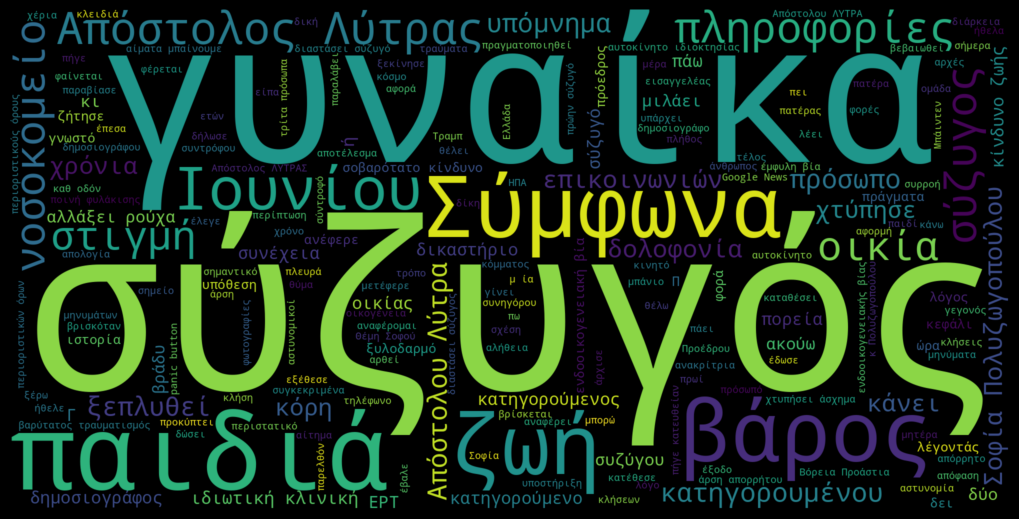

In [61]:
text_data = ' '.join(df2['text'])

wordcloud = WordCloud(
    stopwords=nlp.Defaults.stop_words,
    width=2000,
    height=1000,
    background_color='black'
).generate(text_data)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()